# Softmax Regression with pytorch 

### Sequential

In [2]:
from torchsummary import summary
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(in_features=3, out_features=1)
    # don't include a softmax layer
)
summary(model, (3,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Số -1 là kiểu train theo full batch hay mini batch ....
### Trong Pytorch sẽ nhận lun logit tức là z (người khuyên ko nên truyền y_hat vào vì hàm ln voi e triệt tiêu họ lm vậy để tang tốc độ )

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load data
iris = np.genfromtxt('../datasets/iris_2D_3c.csv', dtype=None, delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:2], dtype=torch.float32)
y = torch.tensor(iris[:, 2], dtype=torch.int64)

# Define the model
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)

input_dim = X.shape[1]
output_dim = len(torch.unique(y))
model = SoftmaxRegression(input_dim, output_dim)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
max_epoch = 100
losses = []

for epoch in range(max_epoch):    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X)

    # Compute loss
    loss = criterion(outputs, y)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

print(model.linear.weight)
print(model.linear.bias)

d:\CNTT\Machine-learning\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\CNTT\Machine-learning\.conda\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Parameter containing:
tensor([[-0.3869,  0.2637],
        [ 0.3099, -0.6951],
        [-0.0684,  0.1583]], requires_grad=True)
Parameter containing:
tensor([ 0.4479, -0.3244,  0.4522], requires_grad=True)


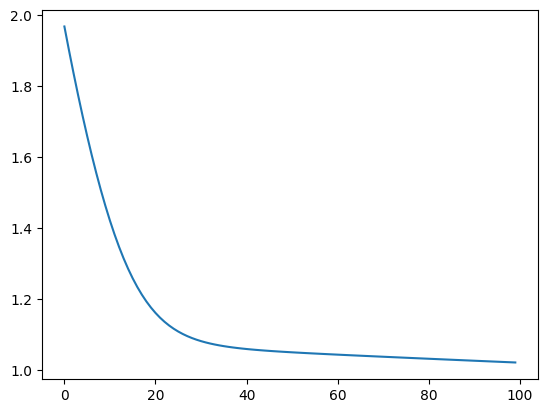

In [4]:
import matplotlib.pyplot as plt

plt.plot(losses)